In [1]:
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Load the dataset

In [2]:
data = pd.read_csv(r'A.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-11-18,27.896016,30.654965,24.523970,26.976368,62546380,0.0,0.0
1,1999-11-19,26.324950,26.363270,24.409017,24.753885,15234146,0.0,0.0
2,1999-11-22,25.328663,26.976368,24.562289,26.976368,6577870,0.0,0.0
3,1999-11-23,26.056724,26.746461,24.523975,24.523975,5975611,0.0,0.0
4,1999-11-24,24.600619,25.711862,24.523981,25.175400,4843231,0.0,0.0
...,...,...,...,...,...,...,...,...
5692,2022-07-06,120.800003,122.339996,120.559998,121.180000,1642300,0.0,0.0
5693,2022-07-07,120.989998,123.220001,120.620003,123.150002,1221200,0.0,0.0
5694,2022-07-08,120.959999,123.209999,120.959999,122.510002,1267300,0.0,0.0
5695,2022-07-11,121.610001,123.459999,121.010002,123.120003,1304400,0.0,0.0


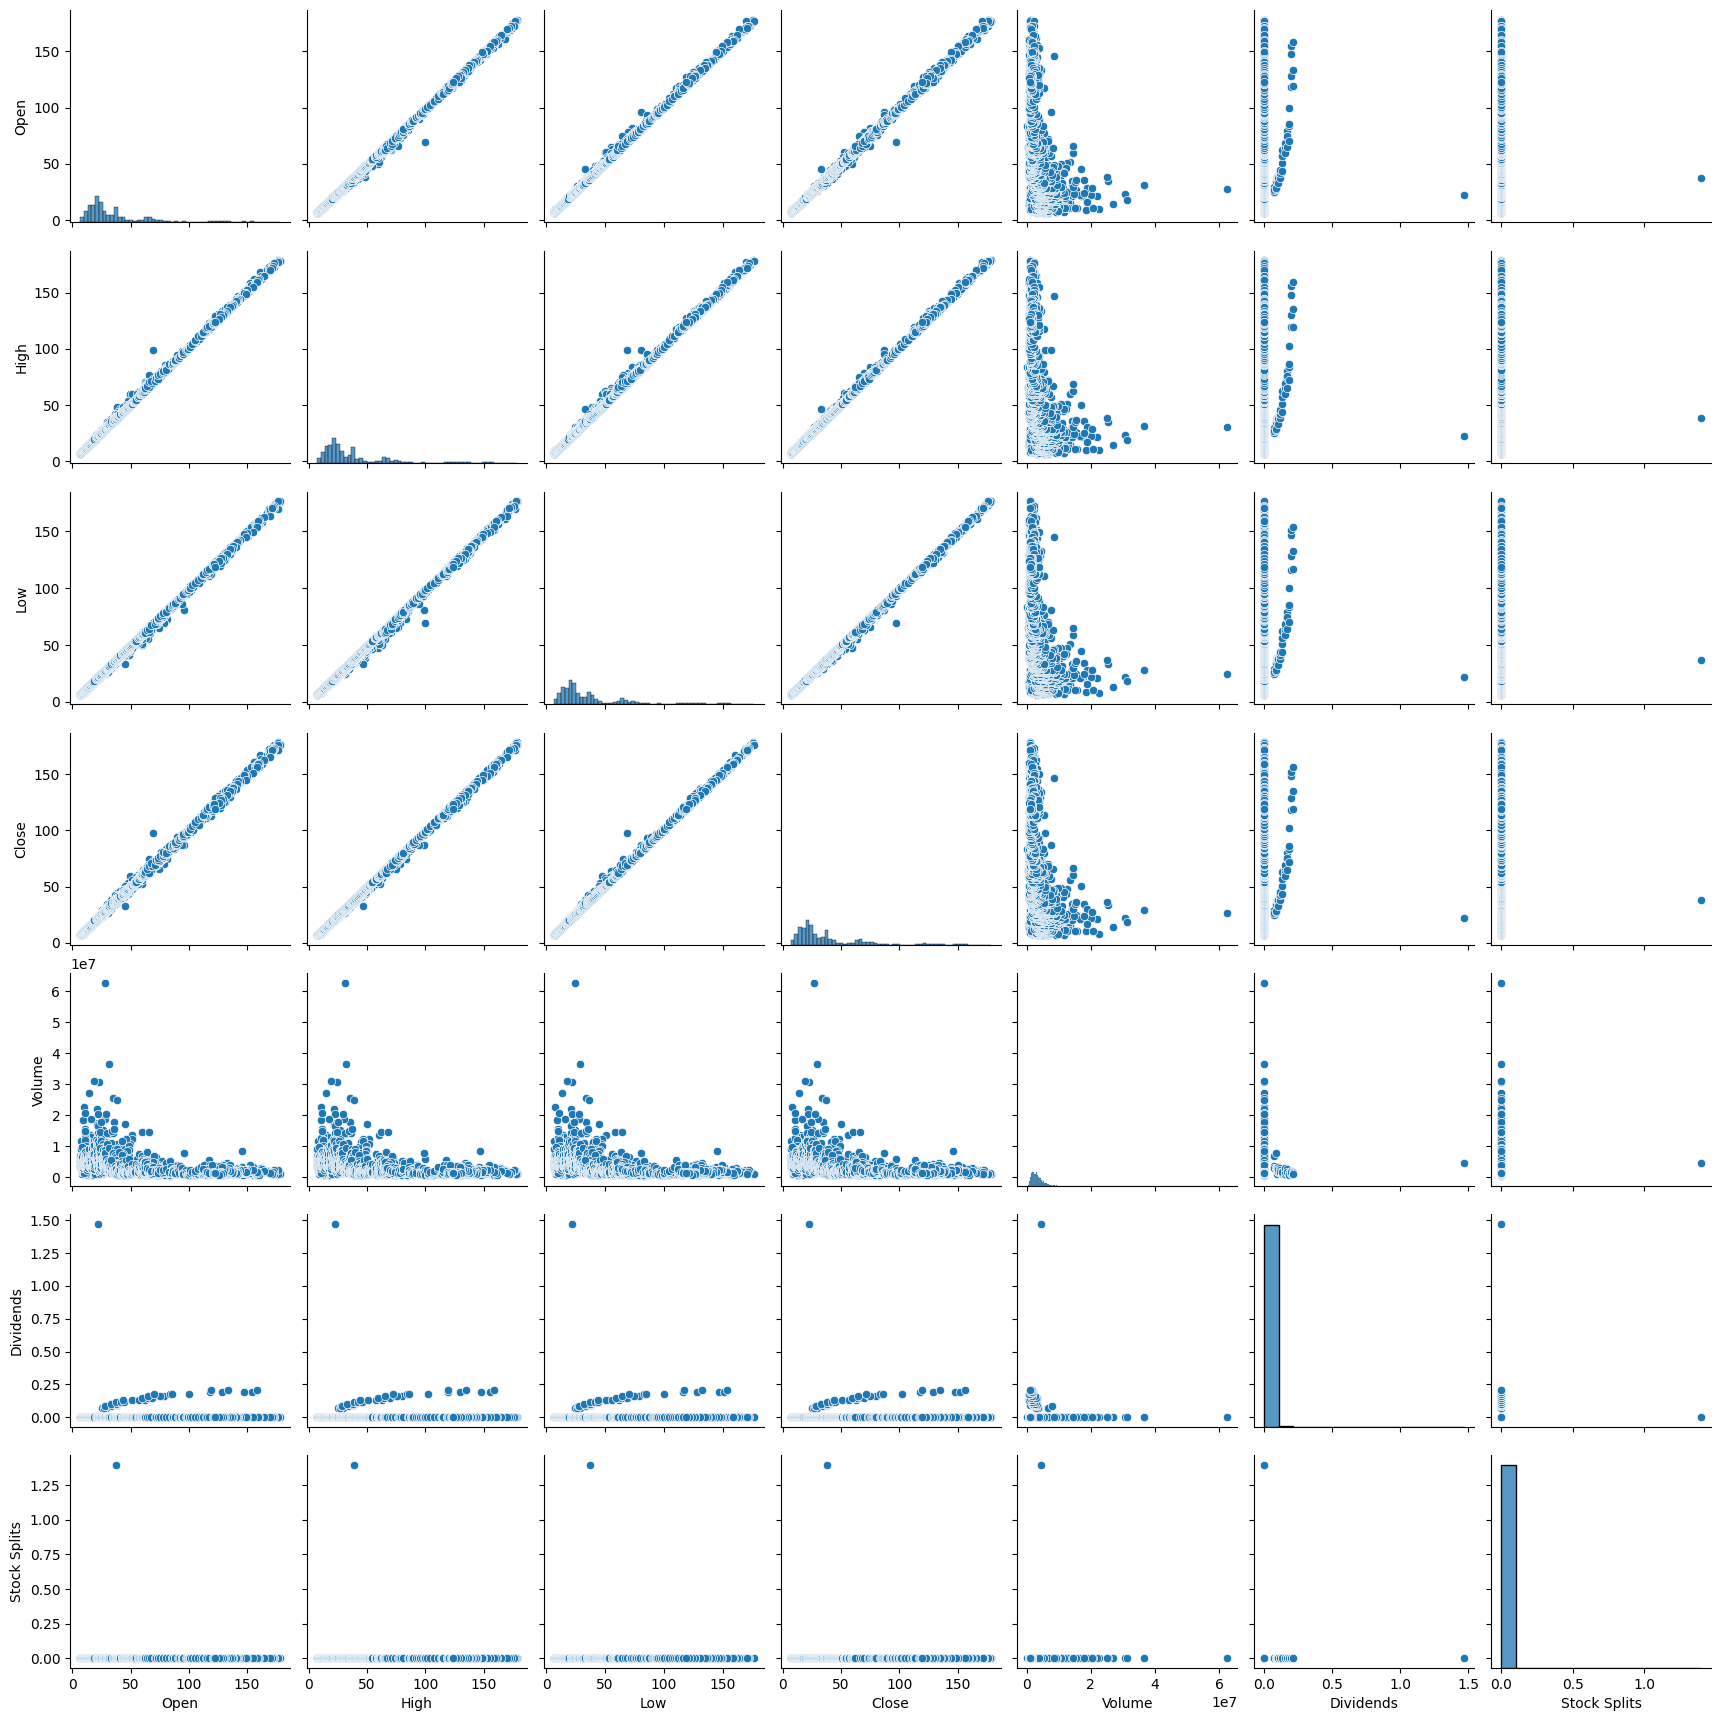

In [3]:
sns.pairplot(data)
plt.show()

In [4]:
data.shape

(5697, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5697 non-null   object 
 1   Open          5697 non-null   float64
 2   High          5697 non-null   float64
 3   Low           5697 non-null   float64
 4   Close         5697 non-null   float64
 5   Volume        5697 non-null   int64  
 6   Dividends     5697 non-null   float64
 7   Stock Splits  5697 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 356.2+ KB


In [6]:
data.drop(['Date'],axis=1,inplace=True)

In [7]:
data.describe().round(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5697.00,5697.00,5697.00,5697.00,5697.00,5697.00,5697.00
mean,40.83,41.35,40.31,40.84,3494630.45,0.00,0.00
std,33.96,34.29,33.60,33.94,2438807.59,0.02,0.02
min,6.56,6.82,6.44,6.65,271900.00,0.00,0.00
25%,19.45,19.68,19.10,19.39,1992430.00,0.00,0.00
50%,27.46,27.78,26.98,27.38,2982773.00,0.00,0.00
75%,48.74,49.38,47.59,48.68,4318981.00,0.00,0.00
max,178.23,178.51,176.13,178.23,62546380.00,1.47,1.40


Doing Normalization

In [8]:
data_copy = data.copy()

In [9]:
data_copy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,27.896016,30.654965,24.523970,26.976368,62546380,0.0,0.0
1,26.324950,26.363270,24.409017,24.753885,15234146,0.0,0.0
2,25.328663,26.976368,24.562289,26.976368,6577870,0.0,0.0
3,26.056724,26.746461,24.523975,24.523975,5975611,0.0,0.0
4,24.600619,25.711862,24.523981,25.175400,4843231,0.0,0.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
Norm = MinMaxScaler()
data_copy = Norm.fit_transform(data_copy)
data_copy

array([[0.12428747, 0.13880346, 0.10658487, ..., 1.        , 0.        ,
        0.        ],
       [0.11513556, 0.1138067 , 0.10590743, ..., 0.24026288, 0.        ,
        0.        ],
       [0.1093319 , 0.11737766, 0.10681068, ..., 0.1012609 , 0.        ,
        0.        ],
       ...,
       [0.6664119 , 0.67788568, 0.67489065, ..., 0.01598408, 0.        ,
        0.        ],
       [0.67019834, 0.67934179, 0.67518532, ..., 0.01657983, 0.        ,
        0.        ],
       [0.67497508, 0.67905059, 0.66186693, ..., 0.01485199, 0.        ,
        0.        ]])

In [11]:
data_copy.shape

(5697, 7)

Converting back the array data to dataframe

In [12]:
data_copy = pd.DataFrame(data_copy,columns=['Open','High','Low','Close','Volume','Dividends','Stock Splits'])
data_copy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0.124287,0.138803,0.106585,0.118458,1.000000,0.0,0.0
1,0.115136,0.113807,0.105907,0.105504,0.240263,0.0,0.0
2,0.109332,0.117378,0.106811,0.118458,0.101261,0.0,0.0
3,0.113573,0.116039,0.106585,0.104164,0.091590,0.0,0.0
4,0.105091,0.110013,0.106585,0.107961,0.073406,0.0,0.0


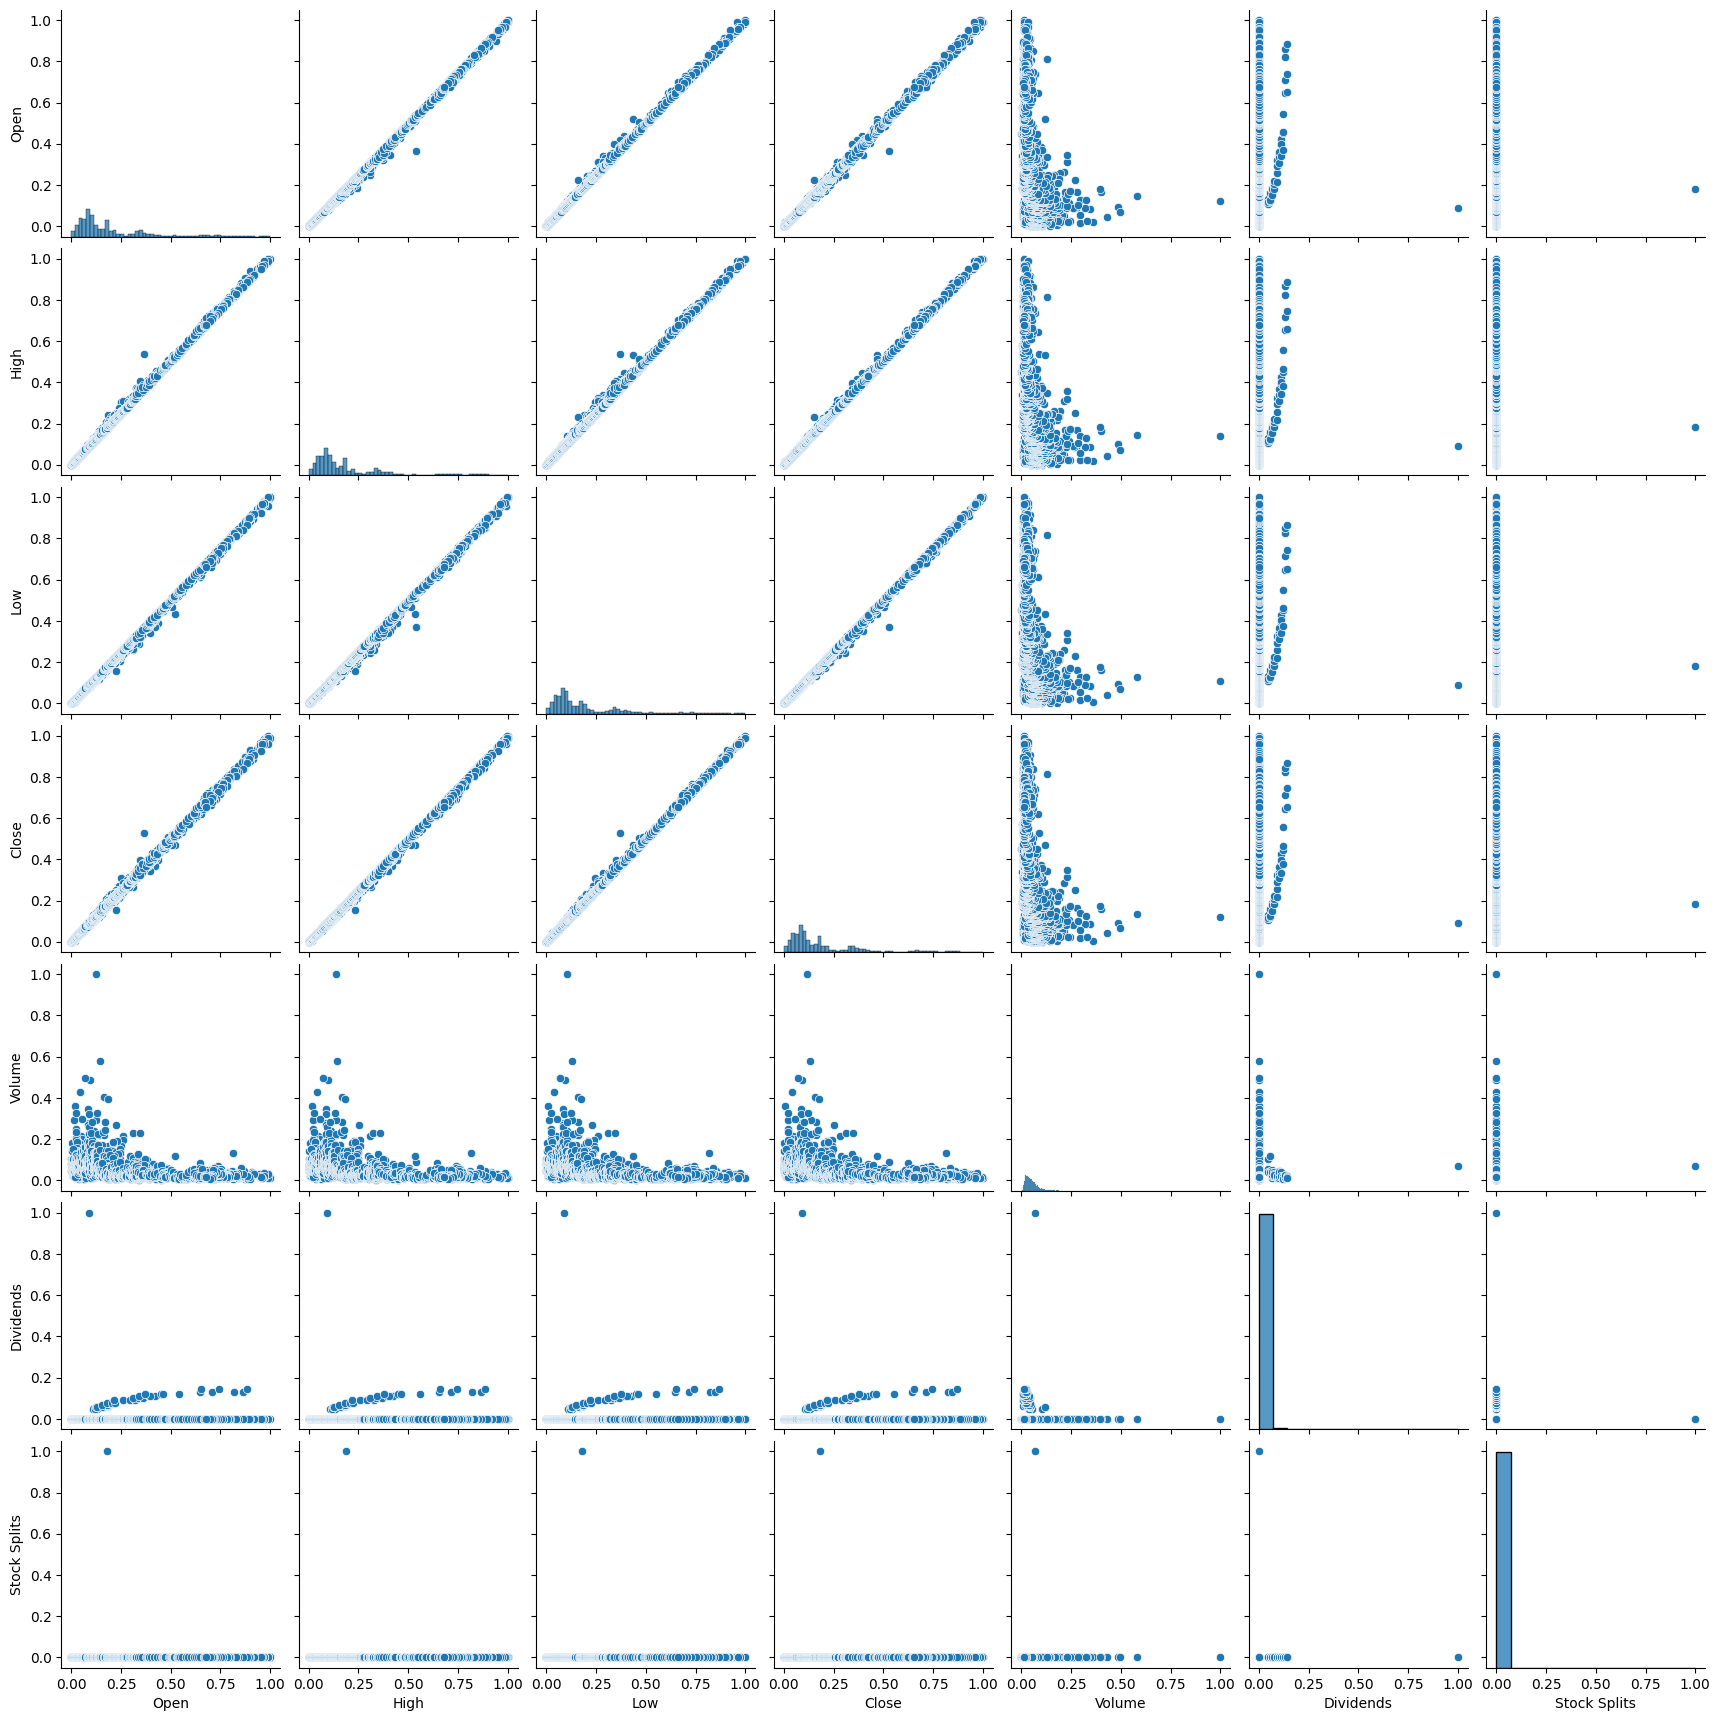

In [13]:
sns.pairplot(data_copy)
plt.show()

In [14]:
data_copy.describe().round(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5697.00,5697.00,5697.00,5697.00,5697.00,5697.00,5697.00
mean,0.20,0.20,0.20,0.20,0.05,0.00,0.00
std,0.20,0.20,0.20,0.20,0.04,0.02,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.08,0.07,0.07,0.07,0.03,0.00,0.00
50%,0.12,0.12,0.12,0.12,0.04,0.00,0.00
75%,0.25,0.25,0.24,0.24,0.06,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Standardization 

In [15]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,27.896016,30.654965,24.523970,26.976368,62546380,0.0,0.0
1,26.324950,26.363270,24.409017,24.753885,15234146,0.0,0.0
2,25.328663,26.976368,24.562289,26.976368,6577870,0.0,0.0
3,26.056724,26.746461,24.523975,24.523975,5975611,0.0,0.0
4,24.600619,25.711862,24.523981,25.175400,4843231,0.0,0.0


In [16]:
data_copy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0.124287,0.138803,0.106585,0.118458,1.000000,0.0,0.0
1,0.115136,0.113807,0.105907,0.105504,0.240263,0.0,0.0
2,0.109332,0.117378,0.106811,0.118458,0.101261,0.0,0.0
3,0.113573,0.116039,0.106585,0.104164,0.091590,0.0,0.0
4,0.105091,0.110013,0.106585,0.107961,0.073406,0.0,0.0


In [17]:
data_copy1 = data.copy()
data_copy1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,27.896016,30.654965,24.523970,26.976368,62546380,0.0,0.0
1,26.324950,26.363270,24.409017,24.753885,15234146,0.0,0.0
2,25.328663,26.976368,24.562289,26.976368,6577870,0.0,0.0
3,26.056724,26.746461,24.523975,24.523975,5975611,0.0,0.0
4,24.600619,25.711862,24.523981,25.175400,4843231,0.0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler
Stand = StandardScaler()
data_copy1 = Stand.fit_transform(data_copy1)

In [19]:
data_copy1.shape

(5697, 7)

In [20]:
data_copy1 = pd.DataFrame(data_copy1,columns=['Open','High','Low','Close','Volume','Dividends','Stock Splits'])
data_copy1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,-0.380856,-0.311805,-0.469901,-0.408400,24.215495,-0.054707,-0.01325
1,-0.427124,-0.436982,-0.473323,-0.473888,4.814052,-0.054707,-0.01325
2,-0.456464,-0.419100,-0.468761,-0.408400,1.264352,-0.054707,-0.01325
3,-0.435023,-0.425806,-0.469901,-0.480662,1.017382,-0.054707,-0.01325
4,-0.477905,-0.455982,-0.469901,-0.461467,0.553024,-0.054707,-0.01325


In [21]:
data_copy1.describe().round(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5697.00,5697.00,5697.00,5697.00,5697.00,5697.00,5697.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.01,-1.01,-1.01,-1.01,-1.32,-0.05,-0.01
25%,-0.63,-0.63,-0.63,-0.63,-0.62,-0.05,-0.01
50%,-0.39,-0.40,-0.40,-0.40,-0.21,-0.05,-0.01
75%,0.23,0.23,0.22,0.23,0.34,-0.05,-0.01
max,4.05,4.00,4.04,4.05,24.22,64.00,75.47


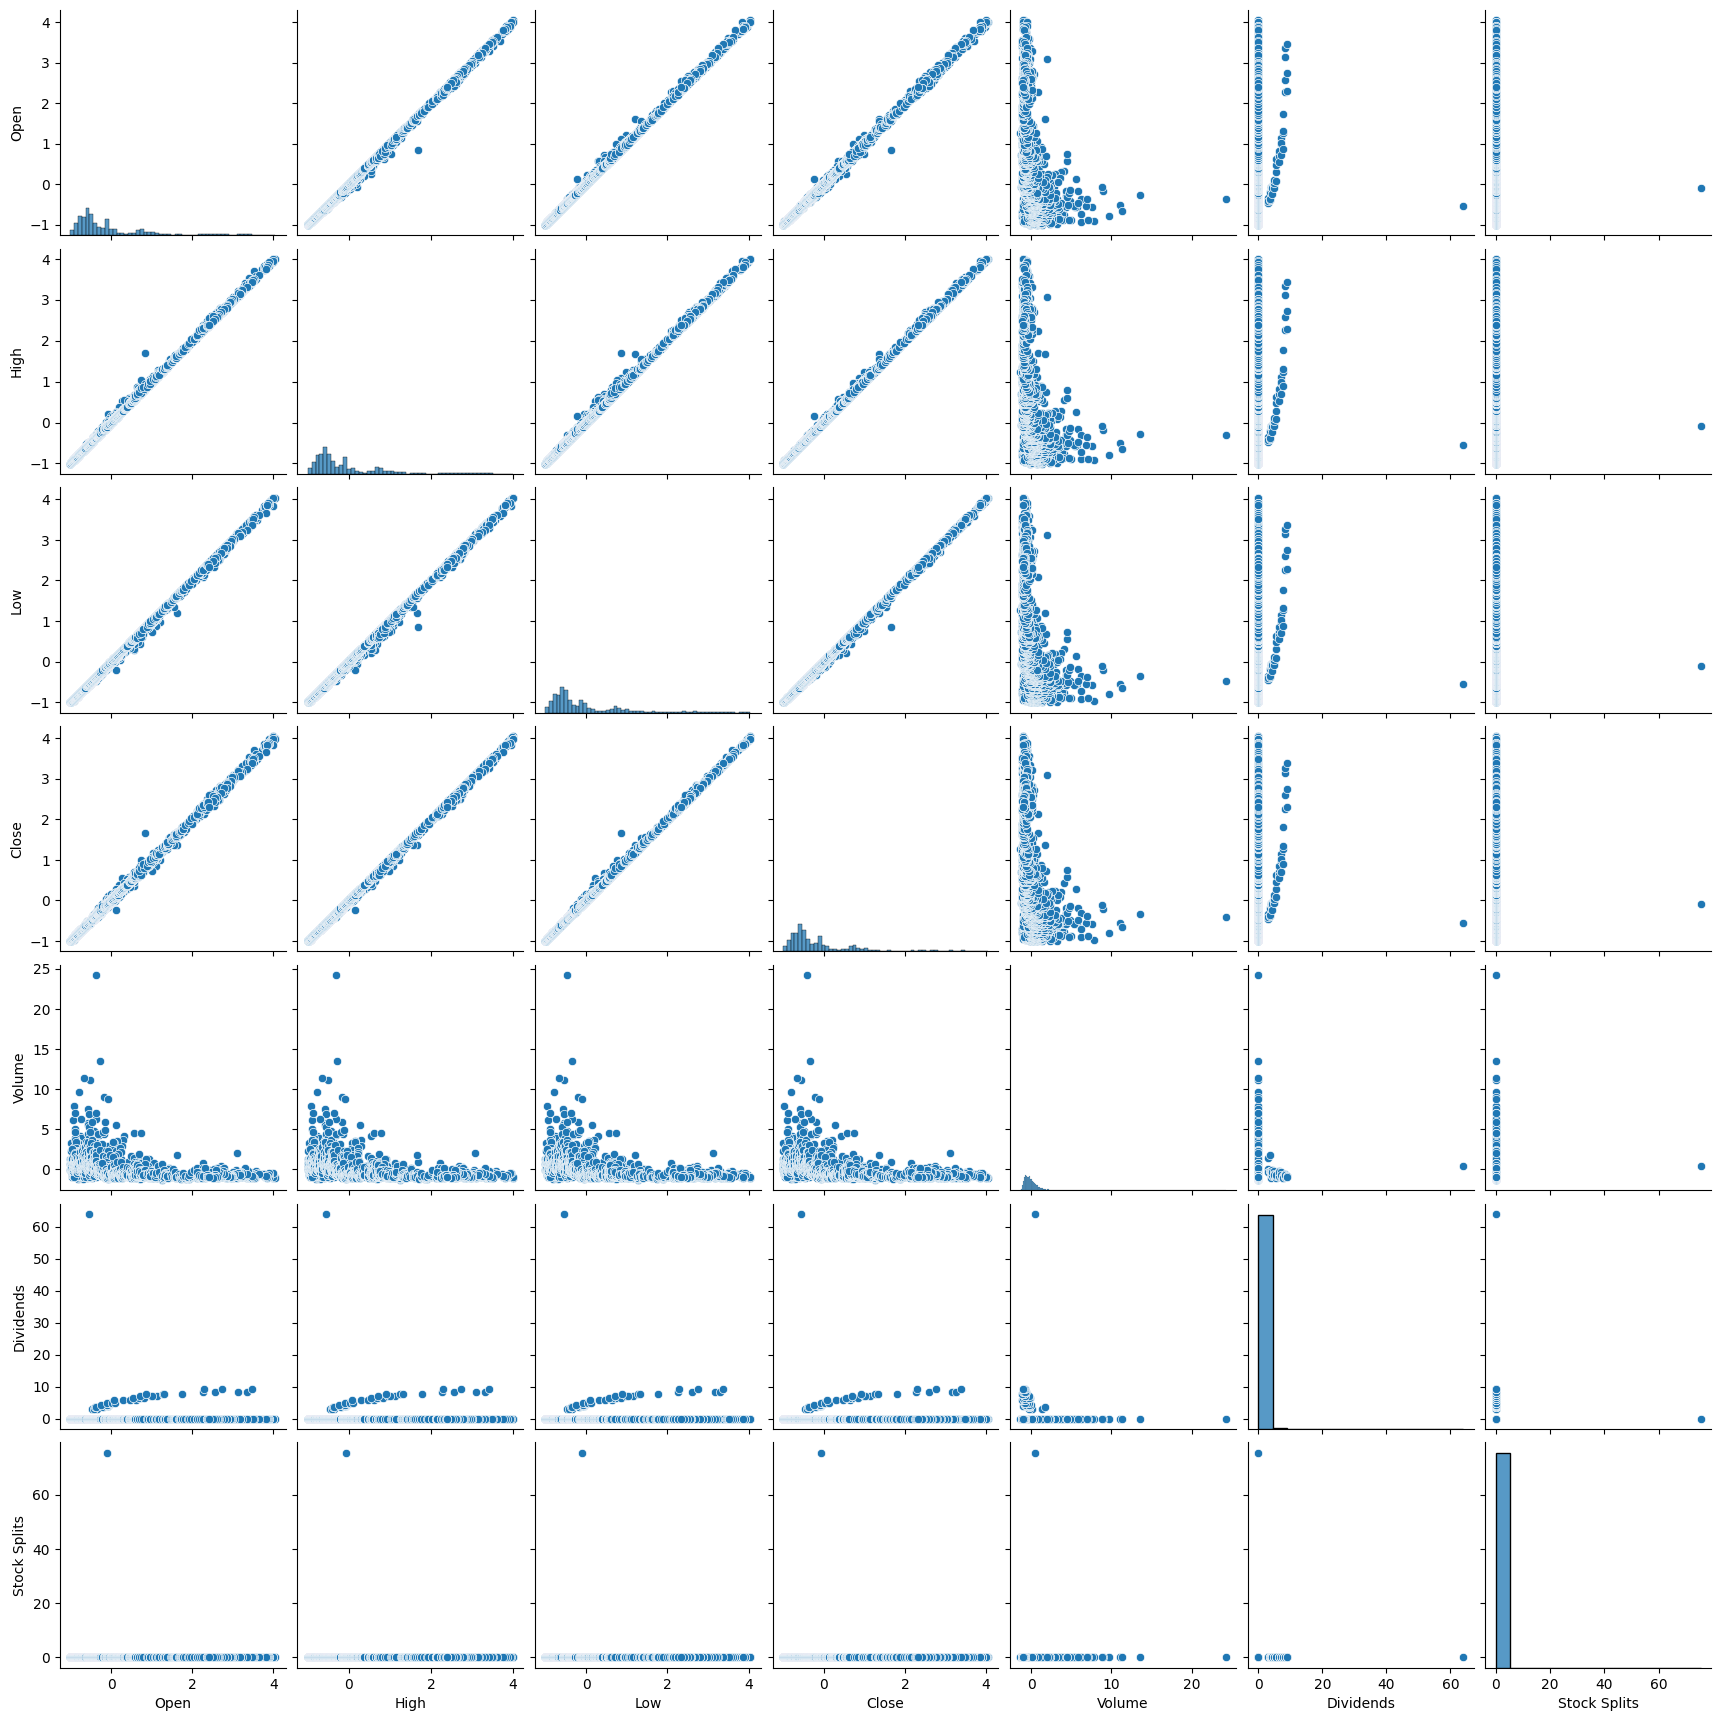

In [22]:
sns.pairplot(data_copy1)
plt.show()